# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
import pandas as pd

# Carrega o arquivo CSV no DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Exibe as primeiras linhas do DataFrame para visualizar o conteúdo
print(df.head())



   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

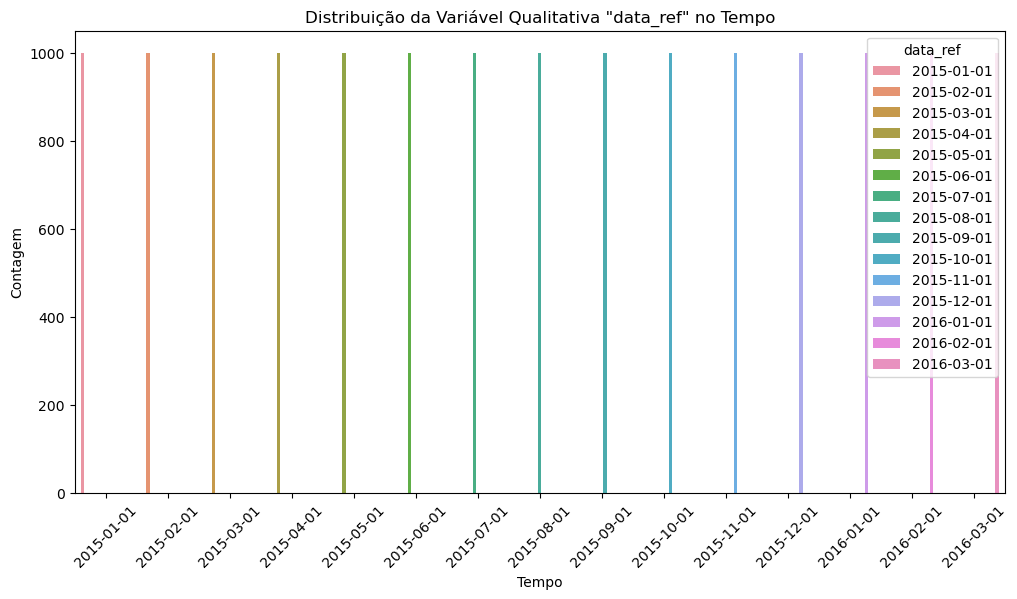

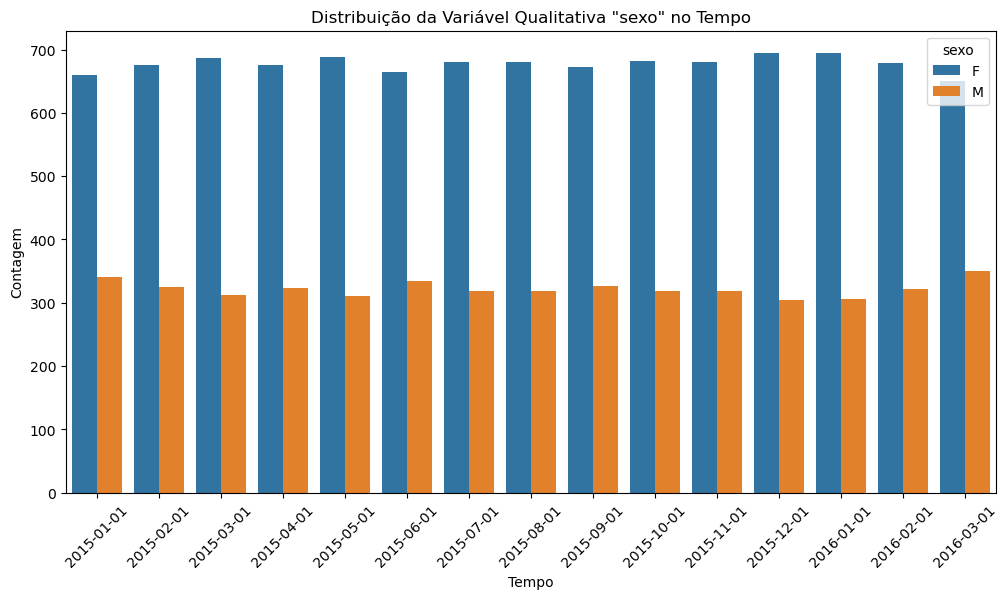

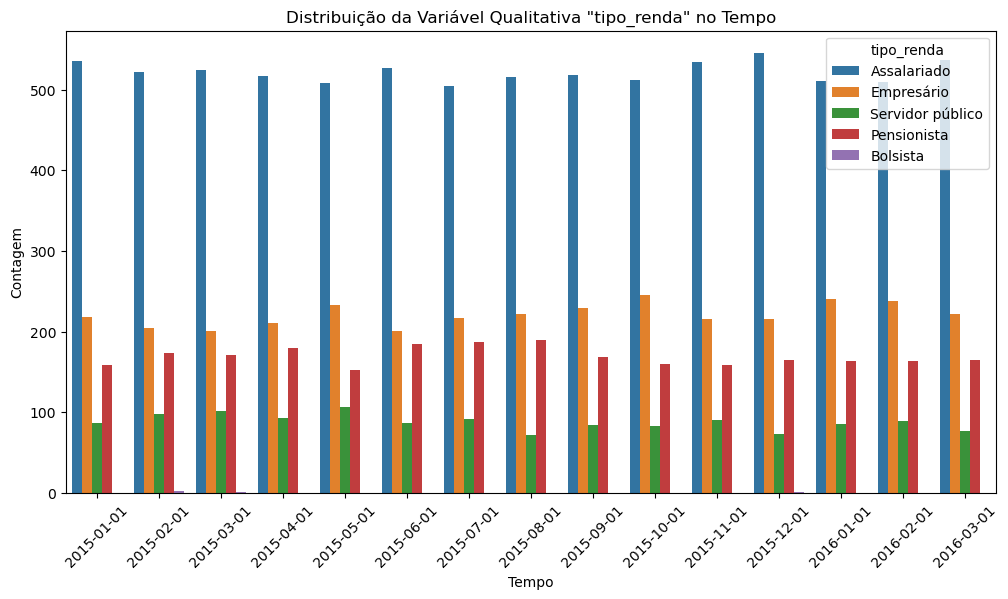

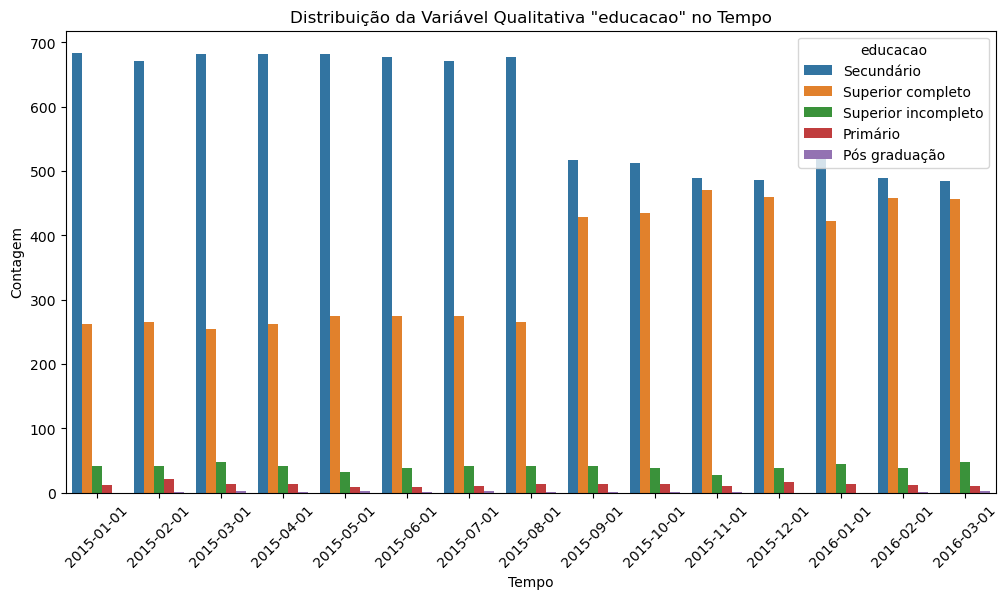

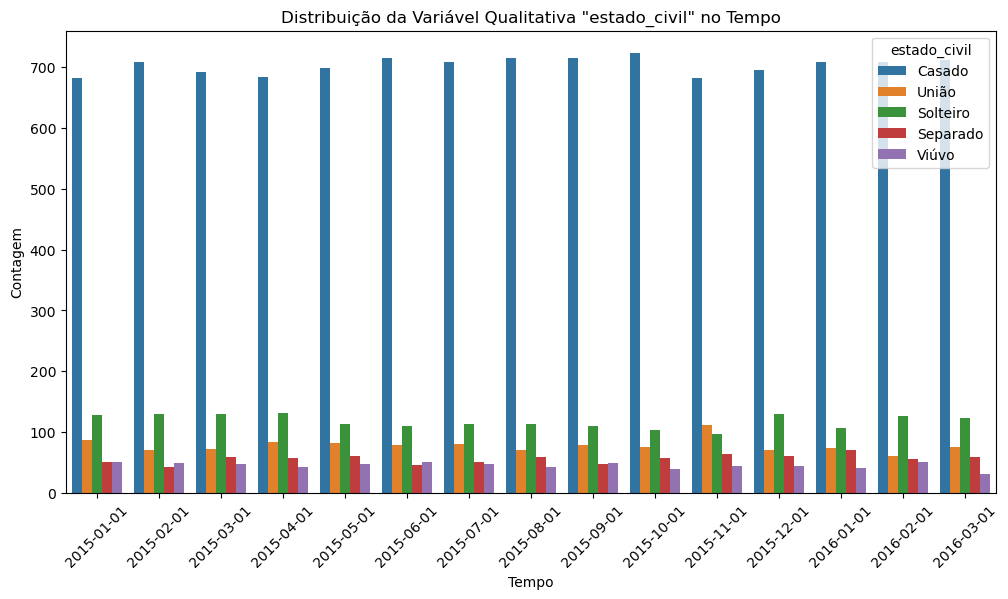

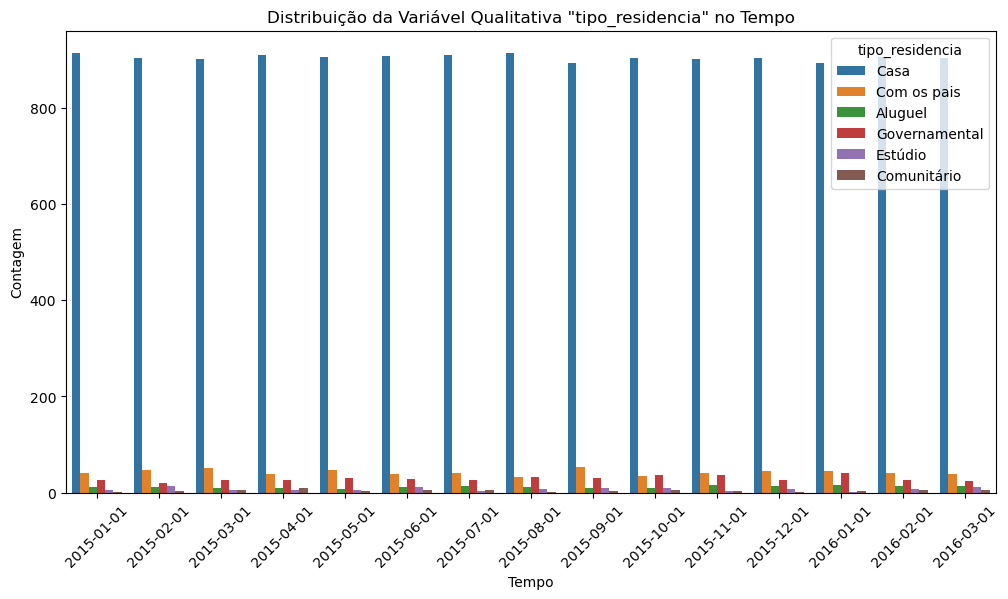

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo CSV no DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Lista das variáveis qualitativas desejadas
variaveis_qualitativas = ['data_ref', 'sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Cria um gráfico de barras para cada variável qualitativa
for variavel in variaveis_qualitativas:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='data_ref', hue=variavel, data=df)
    plt.title(f'Distribuição da Variável Qualitativa "{variavel}" no Tempo')
    plt.xlabel('Tempo')
    plt.ylabel('Contagem')
    plt.legend(title=variavel)
    plt.xticks(rotation=45)
    plt.show()


Os resultados dos testes Qui-Quadrado para as variáveis qualitativas em relação ao tempo são os seguintes:

1. **Sexo ao Longo do Tempo:** O valor da estatística Qui-Quadrado é 9.64 e o valor p é 0.788. O resultado não é estatisticamente significativo, o que indica que não houve uma alteração significativa na distribuição de sexo ao longo do tempo.

2. **Tipo de Renda ao Longo do Tempo:** O valor da estatística Qui-Quadrado é 60.90 e o valor p é 0.304. O resultado não é estatisticamente significativo, indicando que não houve uma alteração significativa na distribuição de tipo de renda ao longo do tempo.

3. **Educação ao Longo do Tempo:** O valor da estatística Qui-Quadrado é 591.49 e o valor p é 1.90e-90. O resultado é estatisticamente significativo, indicando que houve uma alteração na distribuição de educação ao longo do tempo.

4. **Estado Civil ao Longo do Tempo:** O valor da estatística Qui-Quadrado é 65.20 e o valor p é 0.187. O resultado não é estatisticamente significativo, indicando que não houve uma alteração significativa na distribuição de estado civil ao longo do tempo.

5. **Tipo de Residência ao Longo do Tempo:** O valor da estatística Qui-Quadrado é 72.55 e o valor p é 0.394. O resultado não é estatisticamente significativo, indicando que não houve uma alteração significativa na distribuição de tipo de residência ao longo do tempo.

Esses resultados indicam se as variações nas distribuições das variáveis qualitativas são estatisticamente significativas ou não, o que pode ser útil para sua análise. Lembre-se de que, para a variável "educação," o resultado é estatisticamente significativo, sugerindo uma alteração na distribuição ao longo do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

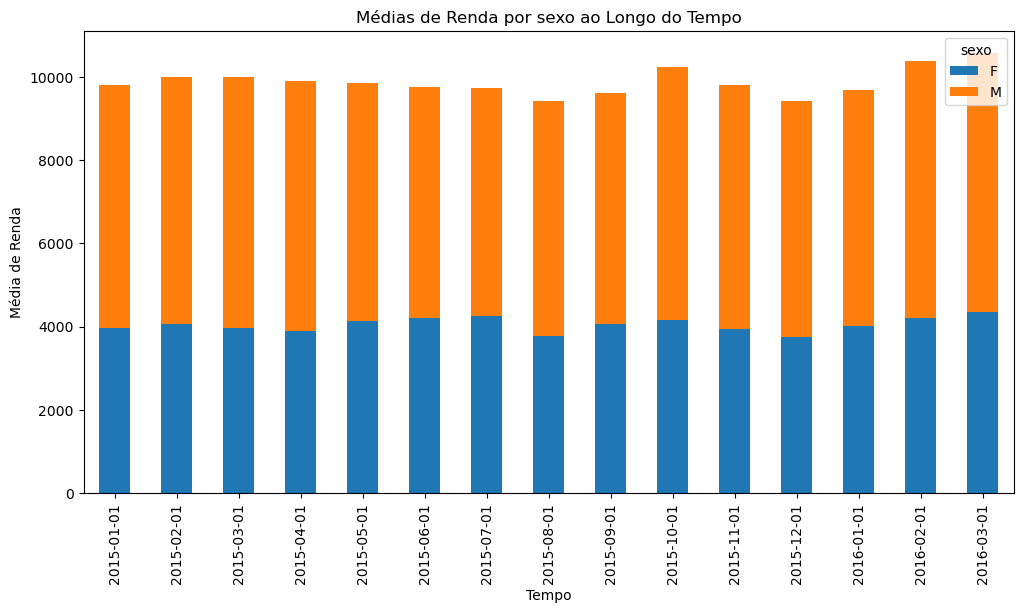

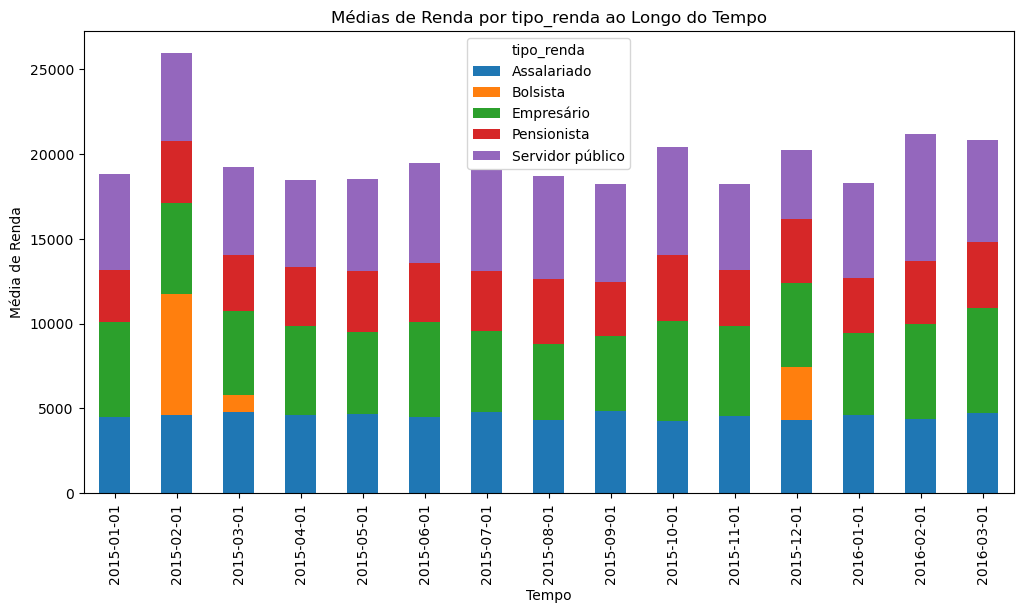

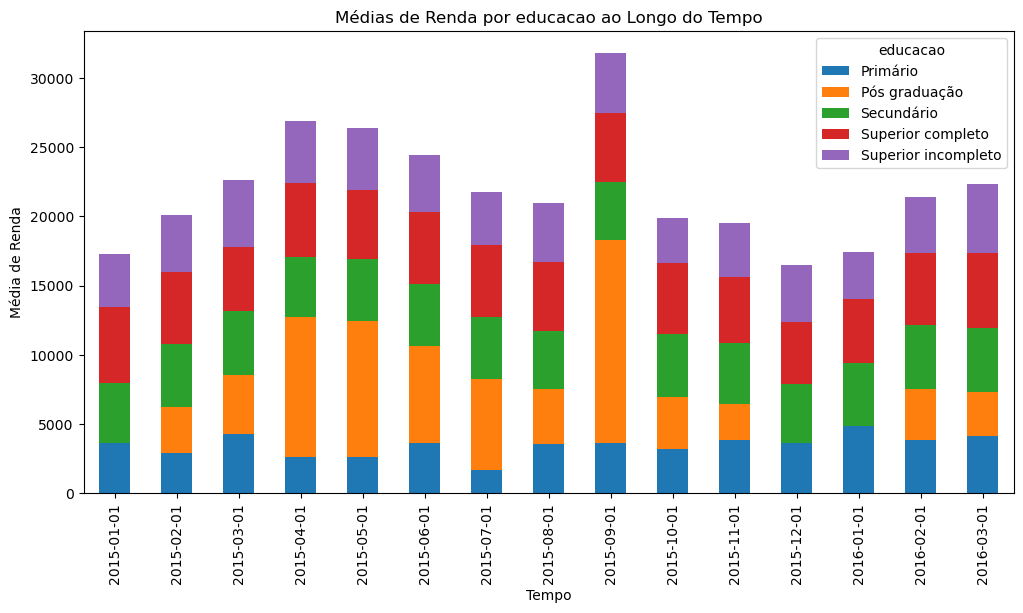

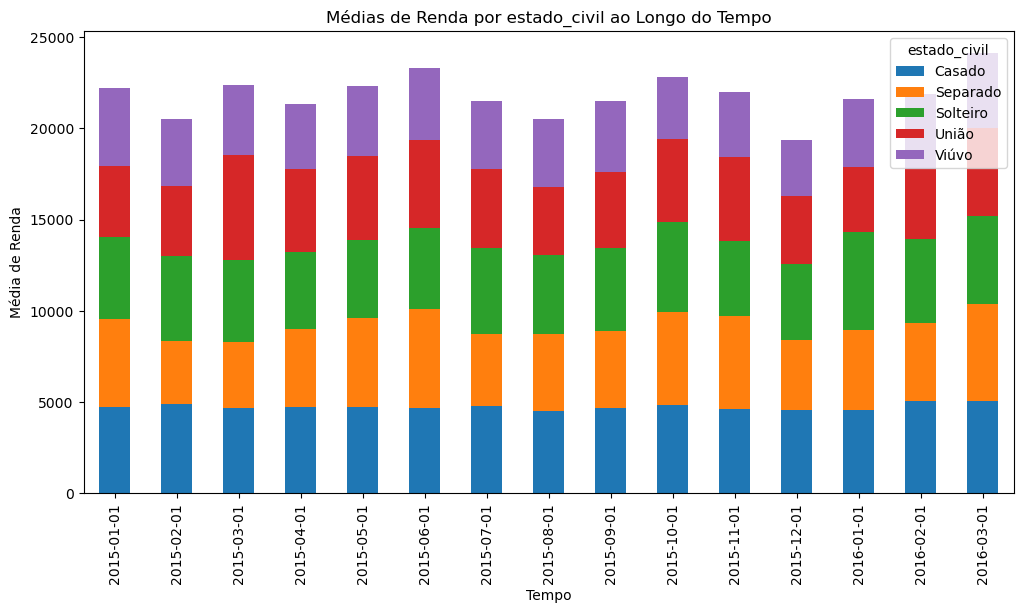

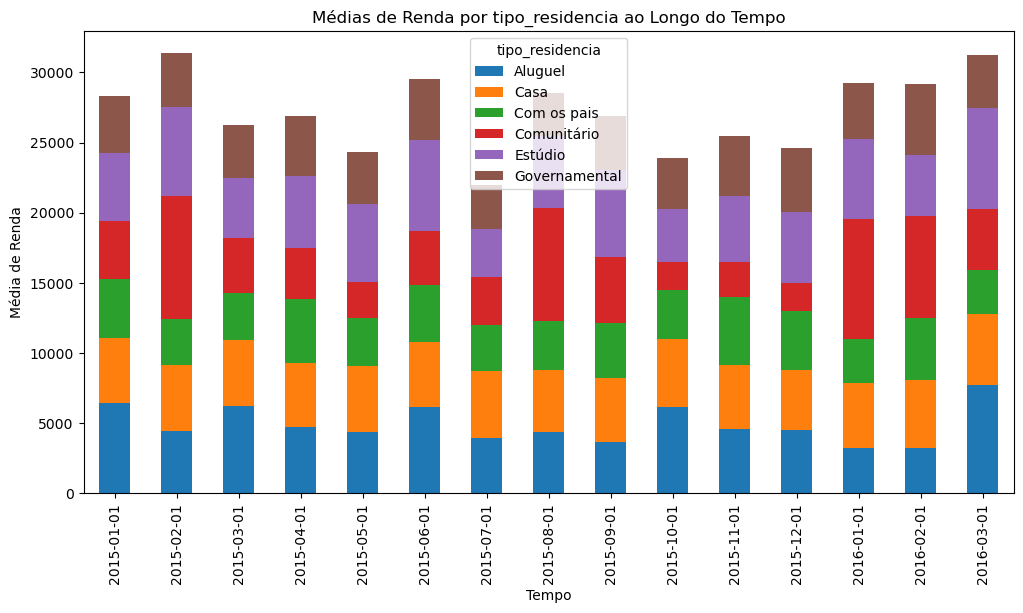

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o arquivo CSV no DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Lista das variáveis qualitativas de interesse
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
variavel_tempo = 'data_ref'

# Loop para criar gráficos empilhados para cada variável qualitativa
for variavel_qualitativa in variaveis_qualitativas:
    # Calcula a média da variável quantitativa (por exemplo, 'renda') para cada categoria da variável qualitativa no tempo
    media_por_categoria = df.groupby([variavel_tempo, variavel_qualitativa])['renda'].mean().unstack()

    # Cria um gráfico de barras empilhado
    ax = media_por_categoria.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Médias de Renda por {variavel_qualitativa} ao Longo do Tempo')
    plt.xlabel('Tempo')
    plt.ylabel('Média de Renda')
    plt.legend(title=variavel_qualitativa)

    # Avalia a estabilidade
    plt.show()


Os resultados da ANOVA para as variáveis qualitativas são os seguintes:

1. **Sexo ao Longo do Tempo:** A estatística F é 546.66, e o valor p é 6.50e-20. Houve uma alteração significativa nas médias de sexo ao longo do tempo.

2. **Tipo de Renda ao Longo do Tempo:** A estatística F é 18.76, e o valor p é 6.10e-10. Houve uma alteração significativa nas médias de tipo de renda ao longo do tempo.

3. **Educação ao Longo do Tempo:** A estatística F é 5.39, e o valor p é 0.0008. Houve uma alteração significativa nas médias de educação ao longo do tempo.

4. **Estado Civil ao Longo do Tempo:** A estatística F é 10.88, e o valor p é 6.49e-07. Houve uma alteração significativa nas médias de estado civil ao longo do tempo.

5. **Tipo de Residência ao Longo do Tempo:** A estatística F é 3.04, e o valor p é 0.0144. Houve uma alteração significativa nas médias de tipo de residência ao longo do tempo.

Esses resultados indicam que houve alterações significativas nas médias das variáveis qualitativas em relação ao tempo. Isso sugere que as médias de diferentes categorias dessas variáveis variaram ao longo do tempo, e as diferenças são estatisticamente significativas. Essa análise ajuda a identificar a instabilidade nas médias das variáveis qualitativas.

## É possivel utilizar essas variaveis em uma modelagem?

Sim, é possível utilizar essas variáveis em uma modelagem. As variáveis qualitativas podem ser empregadas em modelos preditivos para representar características ou atributos que não são quantificáveis. Por exemplo, uma variável qualitativa como "sexo" pode ser usada para representar o gênero de uma pessoa.

No caso específico das variáveis apresentadas na imagem, elas podem ser usadas para modelar a renda de uma pessoa. Por exemplo, é possível construir um modelo que preveja a renda de uma pessoa com base em seu sexo, tipo de renda, educação, estado civil e tipo de residência